In [1]:
import numpy as np
import pickle

In [2]:
def load_obj(name):
    with open(name+'.pkl', 'rb') as f:
        return pickle.load(f, encoding='latin1')

In [3]:
data=load_obj('/global/cscratch1/sd/abbatej/data_cer_all/final_data')

In [4]:
shots=list(data.keys())

In [6]:
data[shots[0]].keys()

dict_keys(['pprime_EFITRT1', 'gasB', 'curr', 'pinj_30L', 'pinj_30R', 'pinj', 'press_EFIT02', 'press_EFIT01', 'curr_target', 'pinj_33L', 'pinj_21L', 'pinj_15L', 'ffprime_EFIT01', 'ffprime_EFIT02', 'ech', 'thomson_dens_EFIT02', 'thomson_dens_EFIT01', 'pinj_33R', 'pinj_15R', 'pinj_21R', 'thomson_dens_EFITRT1', 'gasA', 'gasC', 'thomson_temp_EFIT02', 'gasE', 'gasD', 'tinj', 'thomson_temp_EFIT01', 'ffprime_EFITRT1', 'thomson_temp_EFITRT1', 'time', 'pprime_EFIT02', 'pprime_EFIT01'])

In [7]:
sig_counts={}
for shot in shots:
    for sig in data[shot].keys():
        if sig in sig_counts:
            sig_counts[sig]+=1
        else:
            sig_counts[sig]=0

In [8]:
import matplotlib.pyplot as plt

In [9]:
%matplotlib inline

In [13]:
plt.rcParams['figure.figsize'] = [25, 20]
font={'size': 20, 'weight': 'heavy'}
plt.rc('font', **font)

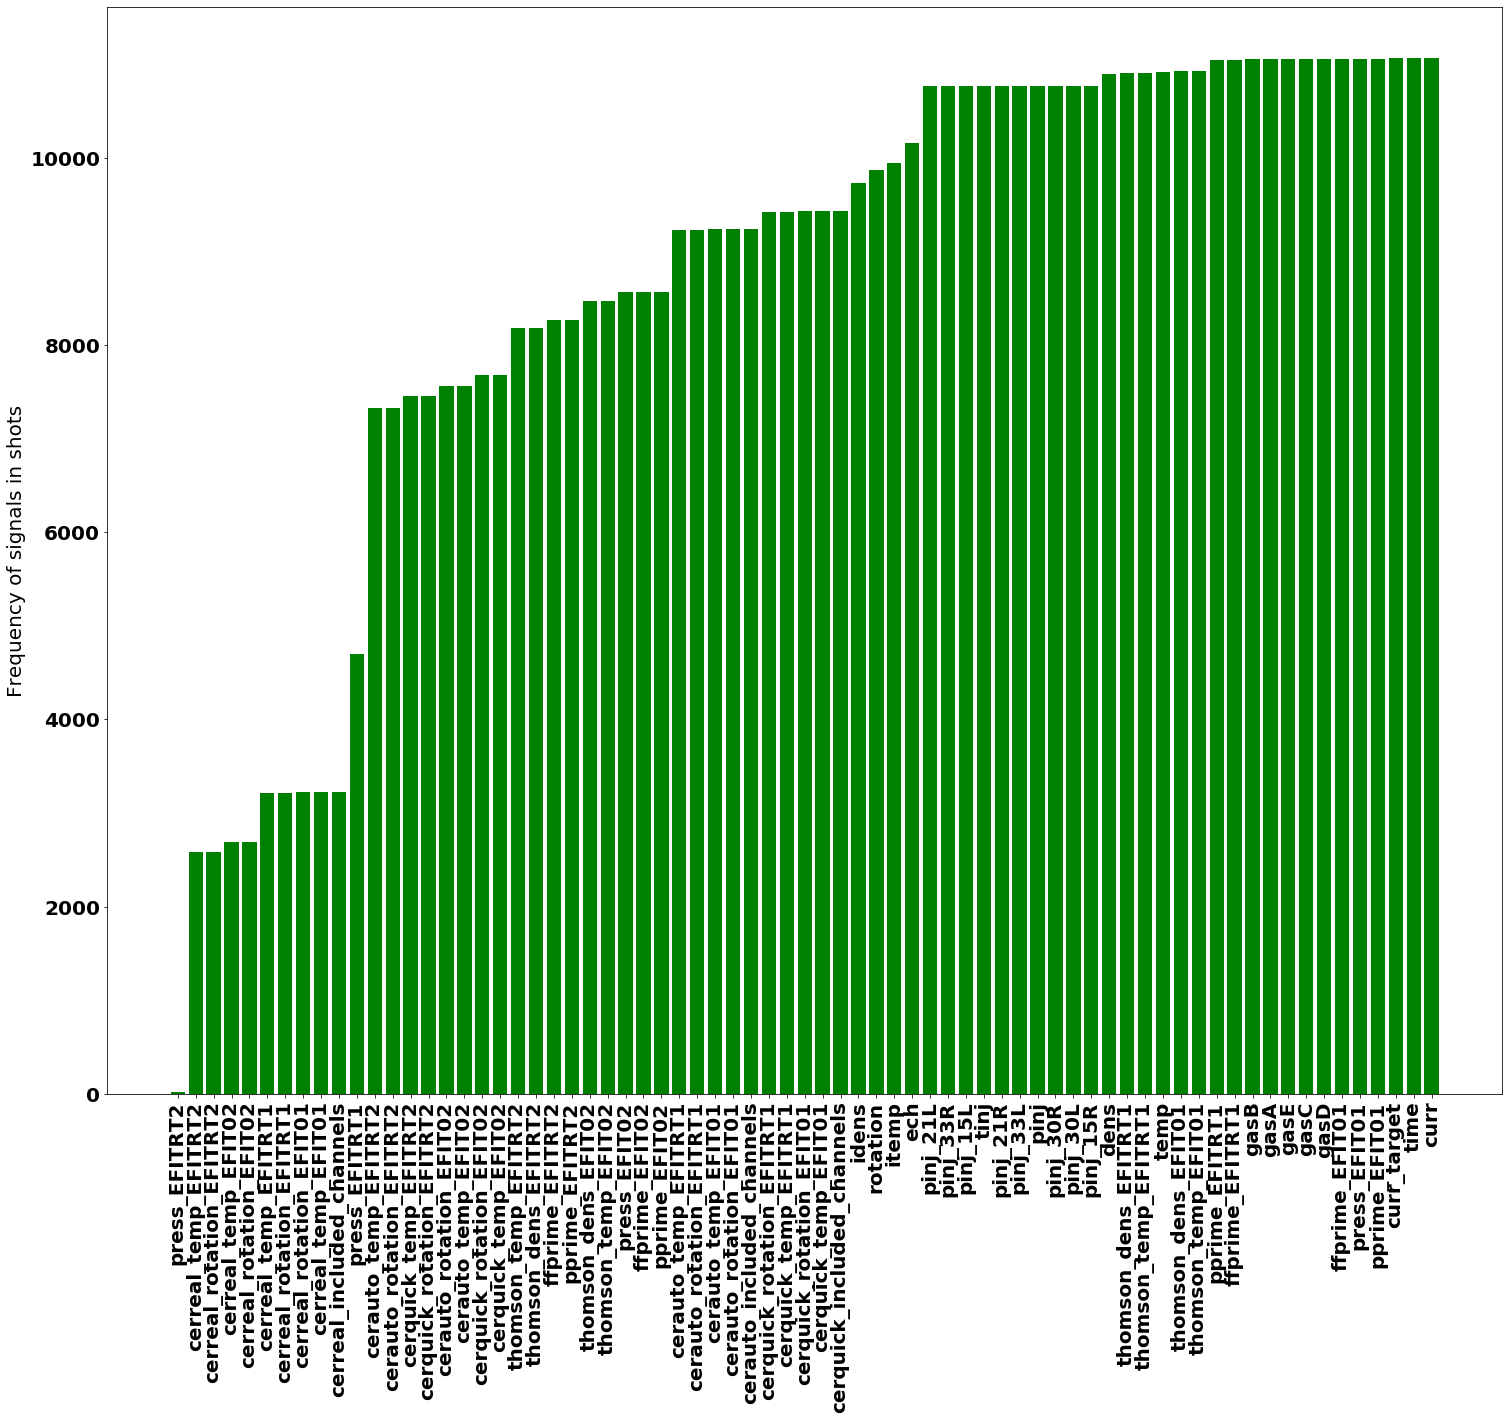

In [14]:
x=np.array(list(sig_counts.keys()))
y=np.array(list(sig_counts.values()))

x=x[np.argsort(y)]
y=np.sort(y)

plt.bar(x, y, color='g')
plt.xticks(rotation=90)
plt.ylabel('Frequency of signals in shots')
plt.show()

In [84]:
valid_shots=[]
for shot in sorted(shots):
    if 'cerquick_temp_EFITRT1' in data[shot] and 'thomson_temp_EFITRT1' in data[shot]:
        valid_shots.append(shot)

In [95]:
beginning_differences=[]
ending_differences=[]
all_nans=[]
all_partial_nans=[]

sigs=['cerquick_temp_EFITRT1','thomson_temp_EFITRT1']
for shot in valid_shots:
    partial_non_nan_inds={}
    total_non_nan_inds={}
    for sig in sigs:
        arr=data[shot][sig]
        partial_non_nan_inds[sig] = np.where(np.any(~np.isnan(arr), axis=1))[0]
        total_non_nan_inds[sig] = np.where(np.all(~np.isnan(arr), axis=1))[0]
    try:
        if any([len(partial_non_nan_inds[sig])==0 for sig in sigs]):
            all_nans.append(shot)
        elif any([len(total_non_nan_inds[sig])==0 for sig in sigs]):
            all_partial_nans.append(shot)
        else:
            beginning_differences.append(partial_non_nan_inds[sigs[0]][0]-partial_non_nan_inds[sigs[1]][0])
            ending_differences.append(partial_non_nan_inds[sigs[0]][-1]-partial_non_nan_inds[sigs[1]][-1])
    except:
        print(shot)

In [67]:
def get_counts(arr):
    counts={}
    for elem in np.unique(arr):
        counts[elem]=len(np.where(arr==elem)[0])
    return counts

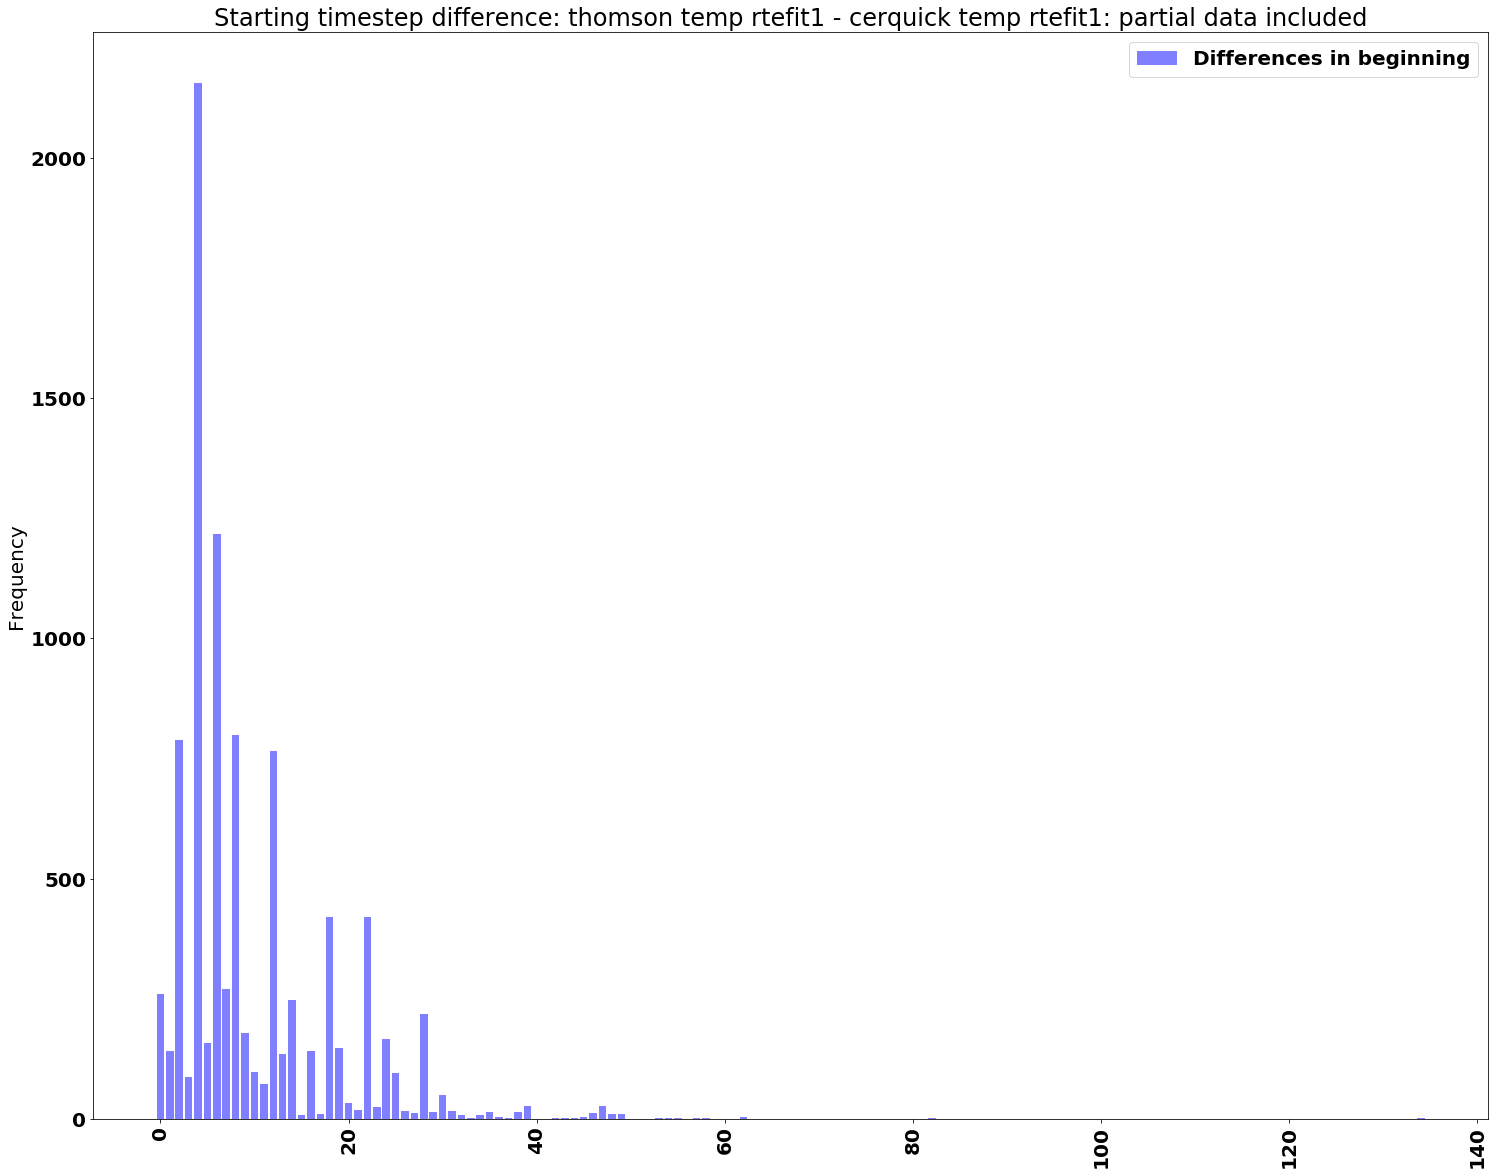

In [97]:
colors=['b','g']
labels=['Differences in beginning']
alpha=.5
datasets=[beginning_differences]

for i,dataset in enumerate(datasets):
    counts=get_counts(dataset)
    x=np.array(list(counts.keys()))
    y=np.array(list(counts.values()))

    x=x[np.argsort(y)]
    y=np.sort(y)

    plt.bar(x, y, color=colors[i],label=labels[i], alpha=alpha)

plt.legend()
plt.title('Starting timestep difference: thomson temp rtefit1 - cerquick temp rtefit1: partial data included')
plt.xticks(rotation=90)
plt.ylabel('Frequency')
plt.show()

In [ ]:
valid_shots=[]
sigs=['cerquick_temp_EFITRT1','itemp']
for shot in sorted(shots):
    if all([sig in data[shot].keys() for sig in sigs]):
        if len(data[shot]['included_cer_channels'])>15:
            valid_shots.append(shot)

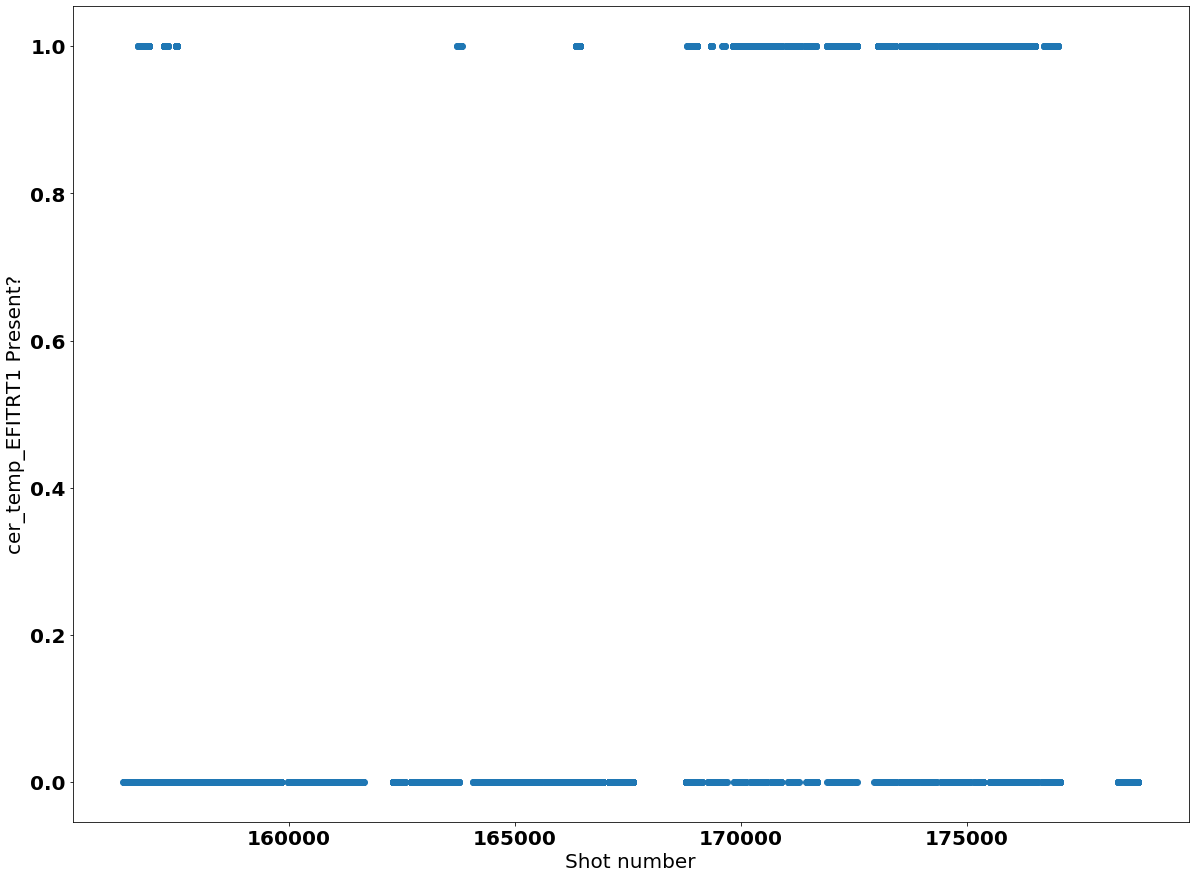

In [79]:
plt.scatter(sorted(shots),sig_present)
plt.xlabel('Shot number')
plt.ylabel('{} Present?'.format(sig))
plt.show()

Shot 172140
2450.0 ms


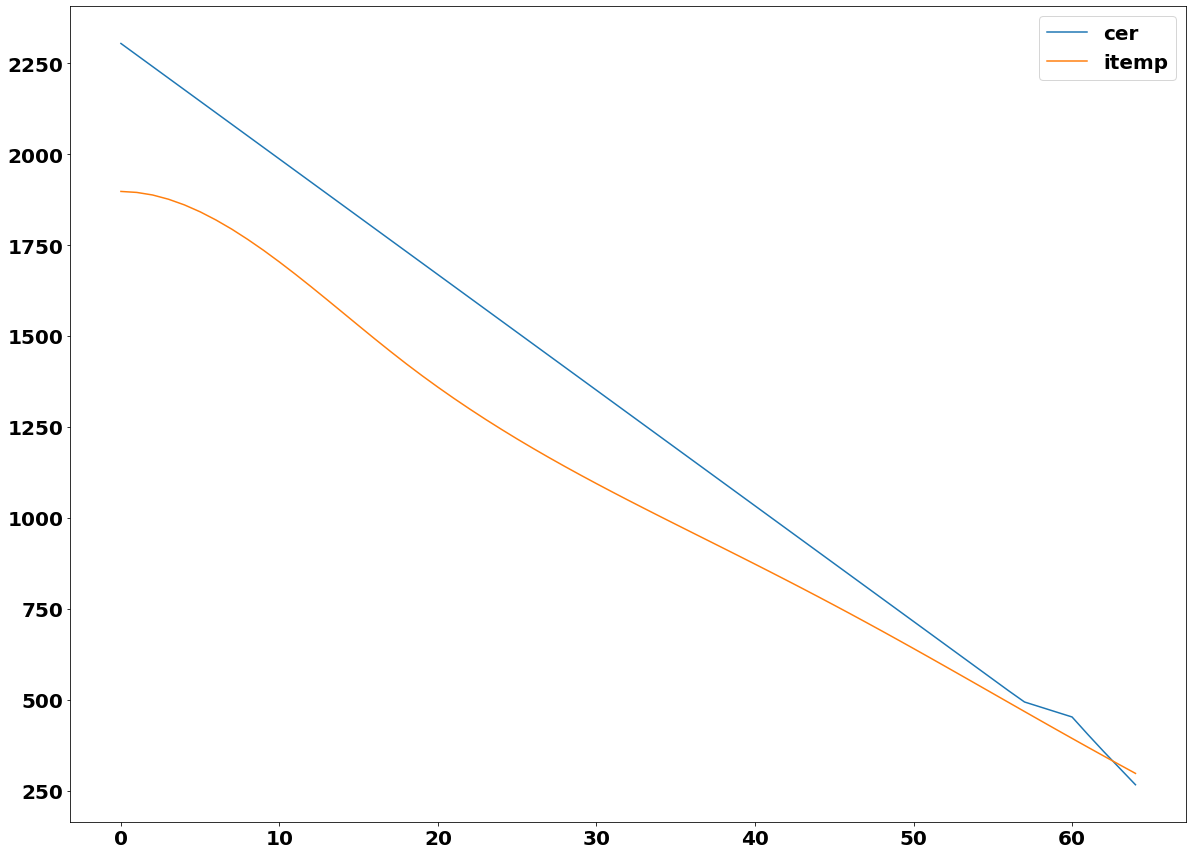

In [188]:
shot=np.random.choice(valid_shots)
print('Shot {}'.format(shot))
ind=np.random.randint(len(data[shot]['time']))
print('{} ms'.format(data[shot]['time'][ind]))
plt.plot(data[shot]['cer_temp_EFITRT1'][ind],label='cer')
plt.plot(data[shot]['itemp'][ind]*1000,label='itemp')
plt.legend()
plt.show()

In [171]:
channel_dict={}
sigs=['cer_temp_EFITRT1','itemp']
for shot in sorted(shots):
    if 'included_cer_channels' in data[shot].keys():
        this_length=len(data[shot]['included_cer_channels'])
        if this_length not in channel_dict:
            channel_dict[this_length]=0
        else:
            channel_dict[this_length]+=1

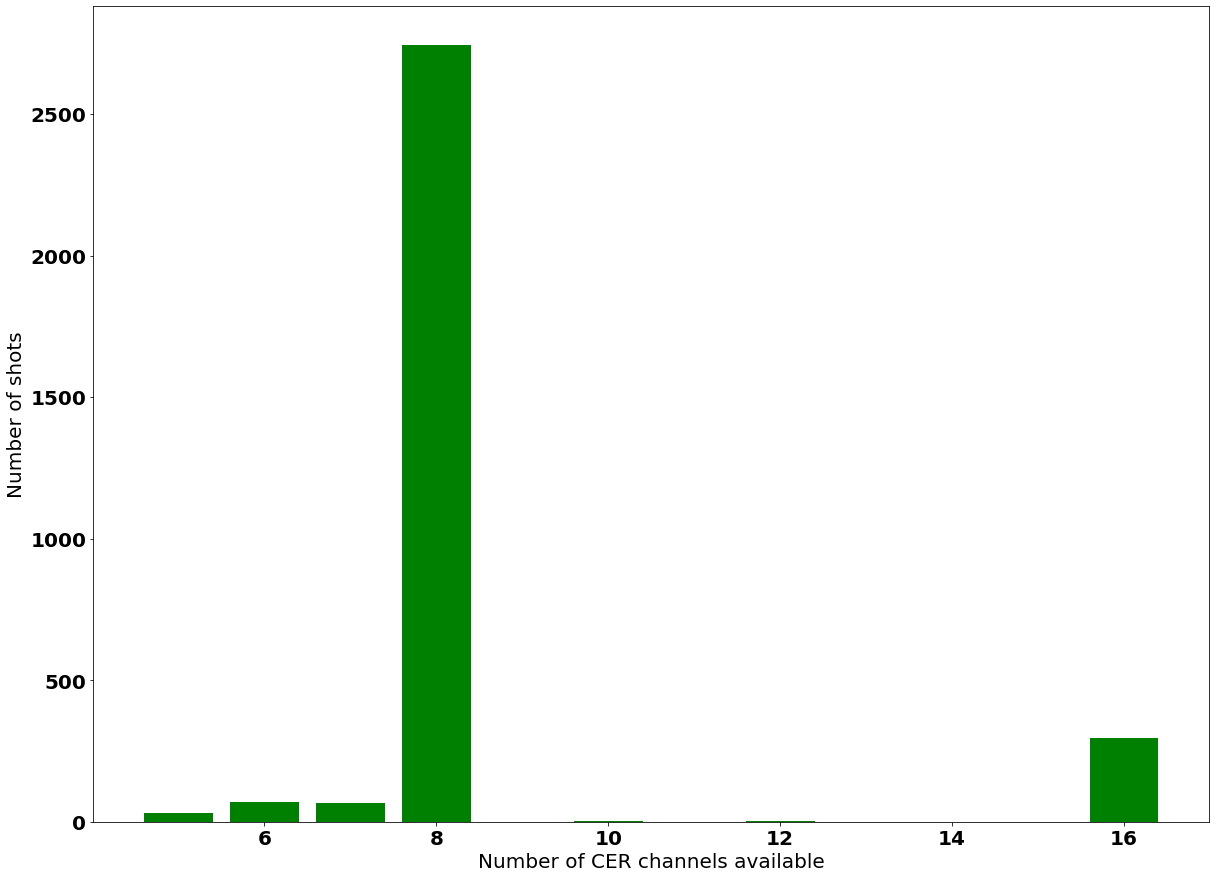

In [190]:
x=np.array(list(channel_dict.keys()))
y=np.array(list(channel_dict.values()))

x=x[np.argsort(y)]
y=np.sort(y)

plt.bar(x, y, color='g')
plt.xlabel('Number of CER channels available')
plt.ylabel('Number of shots')
plt.show()